<a href="https://colab.research.google.com/github/SLCFLAB/DL-Forecasting/blob/main/DL/day2/day2_1_Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neuralforecast datasetsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.0/727.0 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.7 MB/s 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.losses.numpy import mae
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS

In [3]:
data_gold = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/DL-Forecasting/main/DL/day2/datasets/gold.csv')
data_silver = pd.read_csv('https://raw.githubusercontent.com/SLCFLAB/DL-Forecasting/main/DL/day2/datasets/silver.csv')

In [4]:
def standard_scaler(data):
    mean = data['y'].mean()
    std = data['y'].std()
    data['y'] = (data['y']-mean)/std
    return mean, std, data

In [5]:
mean_gold, std_gold, data_gold = standard_scaler(data_gold)
mean_silver, std_silver, data_silver = standard_scaler(data_silver)

In [6]:
data = pd.concat([data_gold,data_silver])
data

,ds,y,unique_id
0,0,-1.336501,gold
1,1,-1.323519,gold
2,2,-1.260577,gold
3,3,-1.291655,gold
4,4,-1.246415,gold
...,...,...,...
1285,1285,0.951773,silver
1286,1286,0.983087,silver
1287,1287,0.920697,silver
1288,1288,0.968616,silver


In [7]:
horizon = 1

In [8]:
%%capture
models_nn = [
            NHITS(h=horizon,
                  input_size=30,
                  max_steps=1000,
                  val_check_steps=100,
                  early_stop_patience_steps=3)
            ]

INFO:lightning_fabric.utilities.seed:Global seed set to 1


In [9]:
nn = NeuralForecast(models=models_nn, freq='D')

data_nn = nn.cross_validation(df=data,
                              val_size=int(.1*len(data.ds.unique())),
                              test_size=int(.1*len(data.ds.unique())),
                              n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [10]:
data_nn

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
253,silver,1285,1284,0.912532,0.951773
254,silver,1286,1285,0.976061,0.983087
255,silver,1287,1286,1.015813,0.920697
256,silver,1288,1287,0.971773,0.968616


In [11]:
nn_predict = data_nn[data_nn['ds']-data_nn['cutoff']==horizon]
nn_predict

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
253,silver,1285,1284,0.912532,0.951773
254,silver,1286,1285,0.976061,0.983087
255,silver,1287,1286,1.015813,0.920697
256,silver,1288,1287,0.971773,0.968616


In [12]:
nn_gold = nn_predict[nn_predict['unique_id']=='gold']
nn_silver = nn_predict[nn_predict['unique_id']=='silver']

In [13]:
nn_gold

,unique_id,ds,cutoff,NHITS,y
0,gold,1161,1160,1.092694,1.150495
1,gold,1162,1161,1.178643,1.153642
2,gold,1163,1162,1.184329,1.181573
3,gold,1164,1163,1.191761,1.174098
4,gold,1165,1164,1.181115,1.215010
...,...,...,...,...,...
124,gold,1285,1284,1.201424,1.207929
125,gold,1286,1285,1.225531,1.216191
126,gold,1287,1286,1.249491,1.196128
127,gold,1288,1287,1.228698,1.228779


In [15]:
nn_gold[['NHITS','y']] = nn_gold[['NHITS','y']]*std_gold + mean_gold
nn_silver[['NHITS','y']] = nn_silver[['NHITS','y']]*std_silver + mean_silver

<ipython-input-15-6b7beb5a65b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_gold[['NHITS','y']] = nn_gold[['NHITS','y']]*std_gold + mean_gold
<ipython-input-15-6b7beb5a65b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nn_silver[['NHITS','y']] = nn_silver[['NHITS','y']]*std_silver + mean_silver


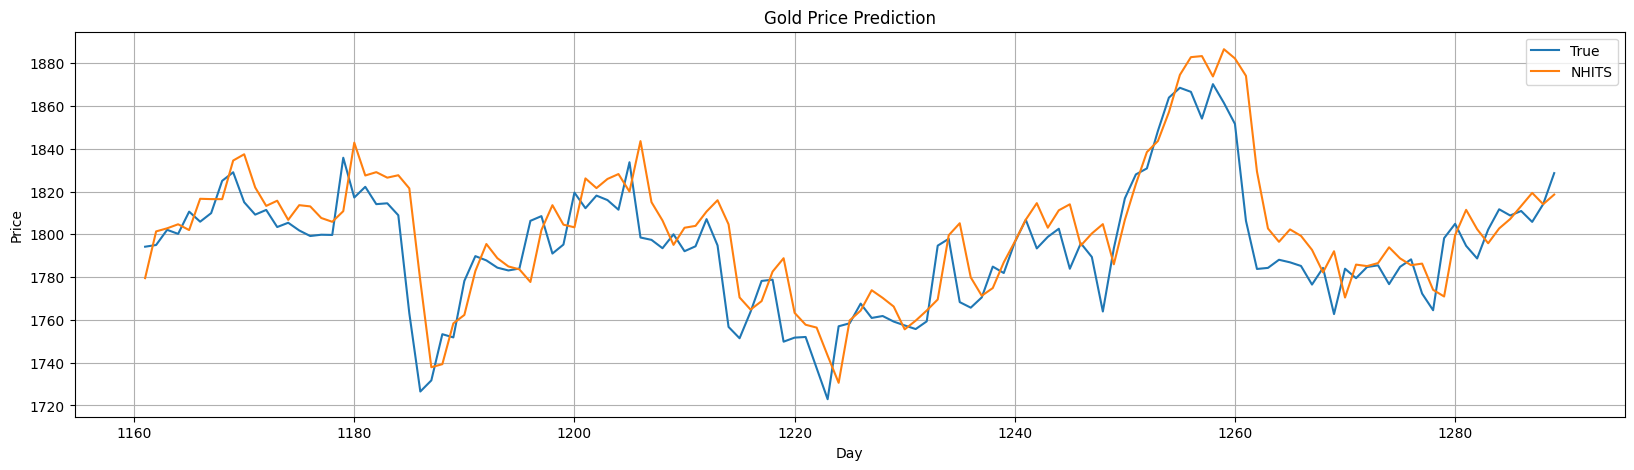

In [16]:
plt.figure(figsize=(20,5))
plt.plot(nn_gold['ds'], nn_gold['y'], label='True')
plt.plot(nn_gold['ds'], nn_gold['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.savefig('gold_nn_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(nn_gold['y'], nn_gold['LSTM'])
mae_tcn = mae(nn_gold['y'], nn_gold['TCN'])
mae_nhits = mae(nn_gold['y'], nn_gold['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 14.107
TCN: 166.129
NHITS: 11.872


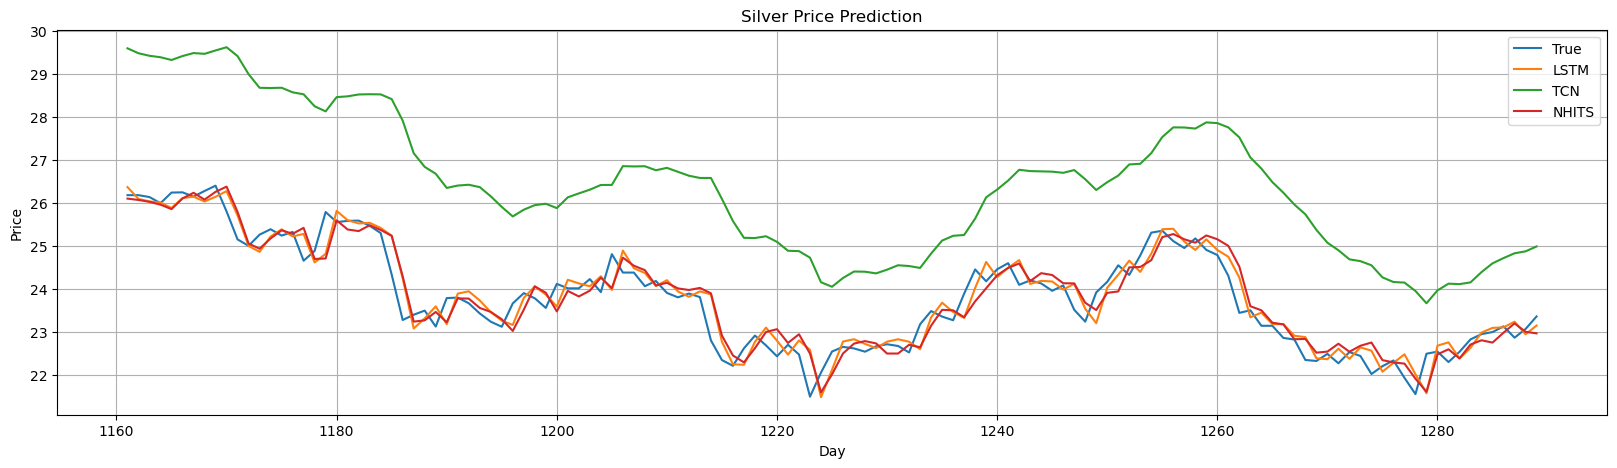

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(nn_silver['ds'], nn_silver['y'], label='True')
plt.plot(nn_silver['ds'], nn_silver['LSTM'], label='LSTM')
plt.plot(nn_silver['ds'], nn_silver['TCN'], label='TCN')
plt.plot(nn_silver['ds'], nn_silver['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.savefig('silver_nn_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(nn_silver['y'], nn_silver['LSTM'])
mae_tcn = mae(nn_silver['y'], nn_silver['TCN'])
mae_nhits = mae(nn_silver['y'], nn_silver['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 0.295
TCN: 2.603
NHITS: 0.309


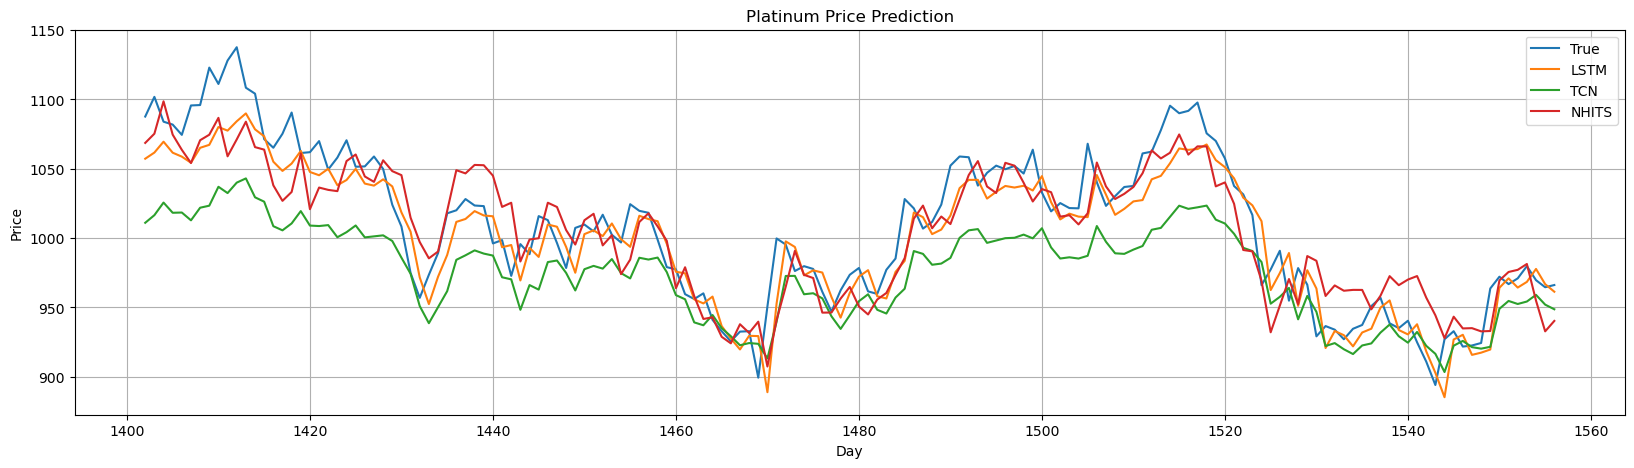

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(nn_platinum['ds'], nn_platinum['y'], label='True')
plt.plot(nn_platinum['ds'], nn_platinum['LSTM'], label='LSTM')
plt.plot(nn_platinum['ds'], nn_platinum['TCN'], label='TCN')
plt.plot(nn_platinum['ds'], nn_platinum['NHITS'], label='NHITS')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.savefig('platinum_nn_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(nn_platinum['y'], nn_platinum['LSTM'])
mae_tcn = mae(nn_platinum['y'], nn_platinum['TCN'])
mae_nhits = mae(nn_platinum['y'], nn_platinum['NHITS'])

print(f'LSTM: {mae_lstm:.3f}')
print(f'TCN: {mae_tcn:.3f}')
print(f'NHITS: {mae_nhits:.3f}')

LSTM: 16.445
TCN: 35.399
NHITS: 20.509


In [ ]:
%%capture
models_tf = [Informer(h=horizon,                 # Forecasting horizon
                      input_size=10,         # Input size
                      max_steps=2000,               # Number of training iterations
                      val_check_steps=100,          # Compute validation loss every 100 steps
                      early_stop_patience_steps=3), # Stop training if validation loss does not improve
             Autoformer(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             PatchTST(h=horizon,
                        input_size=30,
                        max_steps=1000,
                        val_check_steps=100,
                        early_stop_patience_steps=3),
             ]

Global seed set to 1
Global seed set to 1
Global seed set to 1


In [ ]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data,
                               val_size=int(.1*len(data.ds.unique())),
                               test_size=int(.1*len(data.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [ ]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.076379,1.069973,1.116271,1.150495
1,gold,1162,1161,1.121508,1.103007,1.175186,1.153642
2,gold,1163,1162,1.123072,1.165346,1.169328,1.181573
3,gold,1164,1163,1.149099,1.113124,1.184329,1.174098
4,gold,1165,1164,1.135098,1.170680,1.190378,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,0.902388,0.973965,0.923755,0.951773
254,silver,1286,1285,0.908349,0.979009,0.948709,0.983087
255,silver,1287,1286,0.965376,1.002293,0.983380,0.920697
256,silver,1288,1287,0.917720,0.939825,0.931675,0.968616


In [ ]:
tf_predict = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_predict

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.076379,1.069973,1.116271,1.150495
1,gold,1162,1161,1.121508,1.103007,1.175186,1.153642
2,gold,1163,1162,1.123072,1.165346,1.169328,1.181573
3,gold,1164,1163,1.149099,1.113124,1.184329,1.174098
4,gold,1165,1164,1.135098,1.170680,1.190378,1.215010
...,...,...,...,...,...,...,...
253,silver,1285,1284,0.902388,0.973965,0.923755,0.951773
254,silver,1286,1285,0.908349,0.979009,0.948709,0.983087
255,silver,1287,1286,0.965376,1.002293,0.983380,0.920697
256,silver,1288,1287,0.917720,0.939825,0.931675,0.968616


In [ ]:
tf_gold = tf_predict[tf_predict['unique_id']=='gold']
tf_silver = tf_predict[tf_predict['unique_id']=='silver']

In [ ]:
tf_gold

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,gold,1161,1160,1.076379,1.069973,1.116271,1.150495
1,gold,1162,1161,1.121508,1.103007,1.175186,1.153642
2,gold,1163,1162,1.123072,1.165346,1.169328,1.181573
3,gold,1164,1163,1.149099,1.113124,1.184329,1.174098
4,gold,1165,1164,1.135098,1.170680,1.190378,1.215010
...,...,...,...,...,...,...,...
124,gold,1285,1284,1.179179,1.213360,1.199172,1.207929
125,gold,1286,1285,1.175516,1.176338,1.200946,1.216191
126,gold,1287,1286,1.197490,1.180368,1.208708,1.196128
127,gold,1288,1287,1.180163,1.162735,1.199881,1.228779


In [ ]:
tf_gold[['Informer','Autoformer','PatchTST','y']] = tf_gold[['Informer','Autoformer','PatchTST','y']]*std_gold + mean_gold
tf_silver[['Informer','Autoformer','PatchTST','y']] = tf_silver[['Informer','Autoformer','PatchTST','y']]*std_silver + mean_silver

In [ ]:
tf = NeuralForecast(models=models_tf, freq='D')

data_tf = tf.cross_validation(df=data_platinum,
                               val_size=int(.1*len(data_platinum.ds.unique())),
                               test_size=int(.1*len(data_platinum.ds.unique())),
                               n_windows=None)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

In [ ]:
data_tf

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.234710,1.192058,1.240452,1.355287
1,platinum,1403,1402,1.357486,1.376580,1.365999,1.483643
2,platinum,1404,1403,1.579479,1.525100,1.524018,1.321842
3,platinum,1405,1404,1.440169,1.339427,1.370473,1.302860
4,platinum,1406,1405,1.393161,1.323445,1.273693,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.246574,0.268156,0.292026,0.300418
151,platinum,1553,1552,0.286155,0.272106,0.314974,0.379963
152,platinum,1554,1553,0.396550,0.360710,0.360377,0.288667
153,platinum,1555,1554,0.363175,0.290535,0.274984,0.242567


In [ ]:
tf_platinum = data_tf[data_tf['ds']-data_tf['cutoff']==horizon]
tf_platinum

,unique_id,ds,cutoff,Informer,Autoformer,PatchTST,y
0,platinum,1402,1401,1.234710,1.192058,1.240452,1.355287
1,platinum,1403,1402,1.357486,1.376580,1.365999,1.483643
2,platinum,1404,1403,1.579479,1.525100,1.524018,1.321842
3,platinum,1405,1404,1.440169,1.339427,1.370473,1.302860
4,platinum,1406,1405,1.393161,1.323445,1.273693,1.235970
...,...,...,...,...,...,...,...
150,platinum,1552,1551,0.246574,0.268156,0.292026,0.300418
151,platinum,1553,1552,0.286155,0.272106,0.314974,0.379963
152,platinum,1554,1553,0.396550,0.360710,0.360377,0.288667
153,platinum,1555,1554,0.363175,0.290535,0.274984,0.242567


In [ ]:
tf_platinum[['Informer','Autoformer','PatchTST','y']] = tf_platinum[['Informer','Autoformer','PatchTST','y']]*std_platinum + mean_platinum

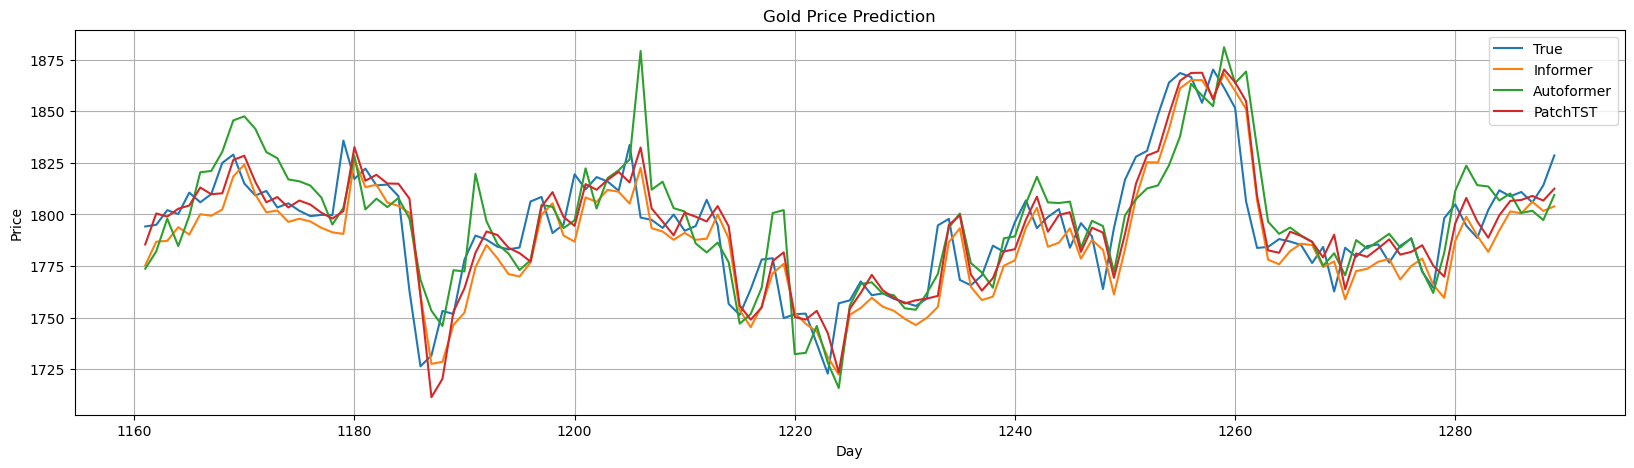

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tf_gold['ds'], tf_gold['y'], label='True')
plt.plot(tf_gold['ds'], tf_gold['Informer'], label='Informer')
plt.plot(tf_gold['ds'], tf_gold['Autoformer'], label='Autoformer')
plt.plot(tf_gold['ds'], tf_gold['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Gold Price Prediction')
plt.grid()
plt.legend()
plt.savefig('gold_tf_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(tf_gold['y'], tf_gold['Informer'])
mae_tcn = mae(tf_gold['y'], tf_gold['Autoformer'])
mae_nhits = mae(tf_gold['y'], tf_gold['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 12.869
Autoformer: 14.565
PatchTST: 11.125


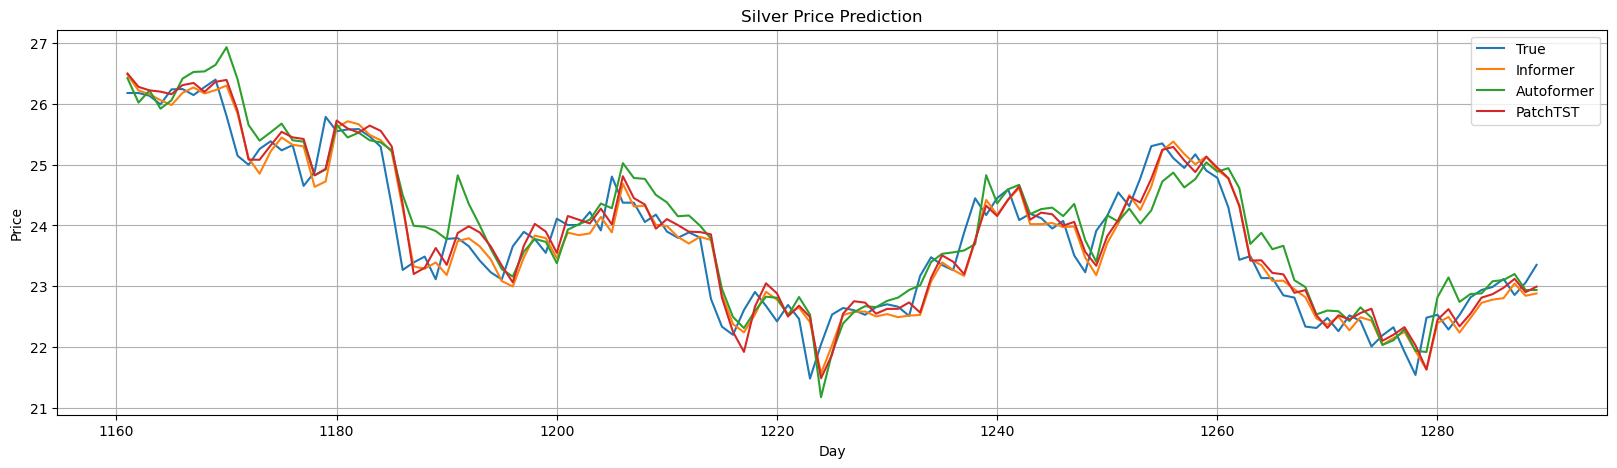

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tf_silver['ds'], tf_silver['y'], label='True')
plt.plot(tf_silver['ds'], tf_silver['Informer'], label='Informer')
plt.plot(tf_silver['ds'], tf_silver['Autoformer'], label='Autoformer')
plt.plot(tf_silver['ds'], tf_silver['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Silver Price Prediction')
plt.grid()
plt.legend()
plt.savefig('silver_tf_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(tf_silver['y'], tf_silver['Informer'])
mae_tcn = mae(tf_silver['y'], tf_silver['Autoformer'])
mae_nhits = mae(tf_silver['y'], tf_silver['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 0.290
Autoformer: 0.375
PatchTST: 0.306


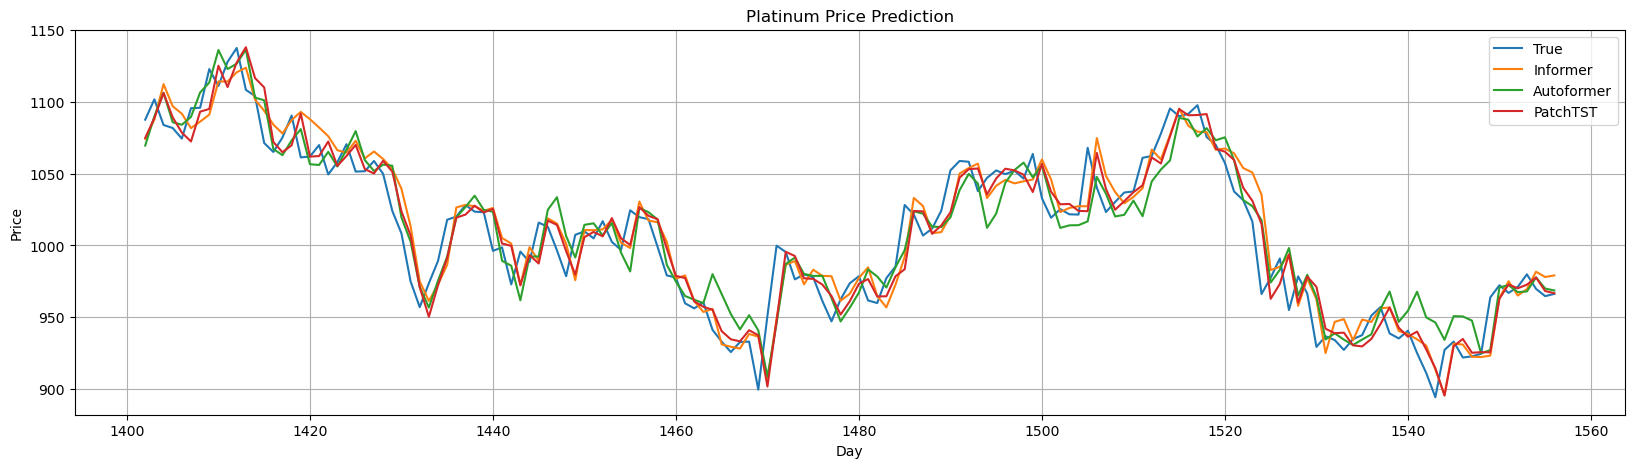

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tf_platinum['ds'], tf_platinum['y'], label='True')
plt.plot(tf_platinum['ds'], tf_platinum['Informer'], label='Informer')
plt.plot(tf_platinum['ds'], tf_platinum['Autoformer'], label='Autoformer')
plt.plot(tf_platinum['ds'], tf_platinum['PatchTST'], label='PatchTST')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Platinum Price Prediction')
plt.grid()
plt.legend()
plt.savefig('platinum_tf_1step.png')
plt.show()

In [ ]:
mae_lstm = mae(tf_platinum['y'], tf_platinum['Informer'])
mae_tcn = mae(tf_platinum['y'], tf_platinum['Autoformer'])
mae_nhits = mae(tf_platinum['y'], tf_platinum['PatchTST'])

print(f'Informer: {mae_lstm:.3f}')
print(f'Autoformer: {mae_tcn:.3f}')
print(f'PatchTST: {mae_nhits:.3f}')

Informer: 14.946
Autoformer: 15.417
PatchTST: 13.683
